In [8]:
import os
import sys


current_dir = os.getcwd()
repo_root = current_dir

while "scripts" not in os.listdir(repo_root):
    parent = os.path.abspath(os.path.join(repo_root, ".."))
    if parent == repo_root:  # reached filesystem root
        raise FileNotFoundError("Cannot find 'scripts' folder in parent directories")
    repo_root = parent

# Add repo root to Python path
if repo_root not in sys.path:
    sys.path.append(repo_root)

print("!Added repo root to sys.path:", repo_root)

import scripts
import scripts.functionConfig as funcConfig
import scripts.accquistions as acq
import scripts.setBoundary as bound
import scripts.setup.gpBuilder as build
import scripts.BBOloop as bbo_loop
from scripts.BBOloop import *
from scripts import *
from scripts.utils.generateX_Y import *

# import scripts
# import scripts.accquistions as acq
# import scripts.setBoundary as bound
# import scripts.setup.gpBuilder as build
# import scripts.BBOloop as bbo_loop  
# from scripts.utils.generateX_Y import *
# from scripts.BBOloop import *
# import scripts.functionConfig as funcConfig
# from collections import defaultdict

!Added repo root to sys.path: /workspaces/MLProject_CapstoneBlackBoxOptimisation


In [11]:
X, y = generate_data(1,7)

Initial count: 10
Weekly count: 7
Combined: 17
17


In [12]:
import numpy as np

objective_values = y  # your function evaluations
best_idx = np.argmax(objective_values)
best_point = X[best_idx]
best_value = objective_values[best_idx]

print("Best point:", best_point)
print("Best value:", best_value)


Best point: [0.73102363 0.73299988]
Best value: 7.710875114502849e-16


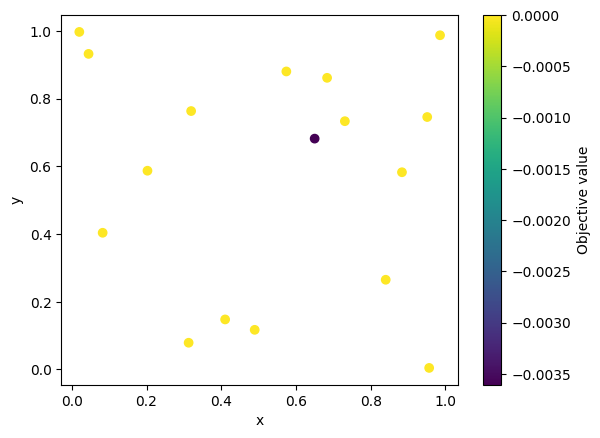

In [13]:
import matplotlib.pyplot as plt
xs = [pt[0] for pt in X]
ys = [pt[1] for pt in X]
vals = y  # corresponding objective values

plt.scatter(xs, ys, c=vals, cmap='viridis')
plt.colorbar(label='Objective value')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [14]:
import matplotlib.pyplot as plt

# Suppose:
# your_candidates = [(x1,y1), (x2,y2), ...]
# your_values = [v1, v2, ...]

xs = [pt[0] for pt in your_candidates]
ys = [pt[1] for pt in your_candidates]
vals = your_values

plt.scatter(xs, ys, c=vals, cmap='viridis')
plt.colorbar(label='Evaluated value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Where you have sampled and their objective values')
plt.show()


NameError: name 'your_candidates' is not defined

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

# Suppose you have:
# your_candidates = list of input points, each is an array([x, y])
# your_values = list of corresponding objective values

# X = np.array(your_candidates)  # shape (n_samples, 2)
# y = np.array(your_values)      # shape (n_samples, )

# Define a kernel: RBF + WhiteKernel (for noise)
kernel = ConstantKernel(1.0) * RBF(length_scale=[1.0, 1.0]) + WhiteKernel(noise_level=1e-6)

# Create GP regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

# Fit GP to your data
gp.fit(X, y)

print("Fitted kernel:", gp.kernel_)


Fitted kernel: 1.04**2 * RBF(length_scale=[0.0197, 2.53e+03]) + WhiteKernel(noise_level=1.46e-05)


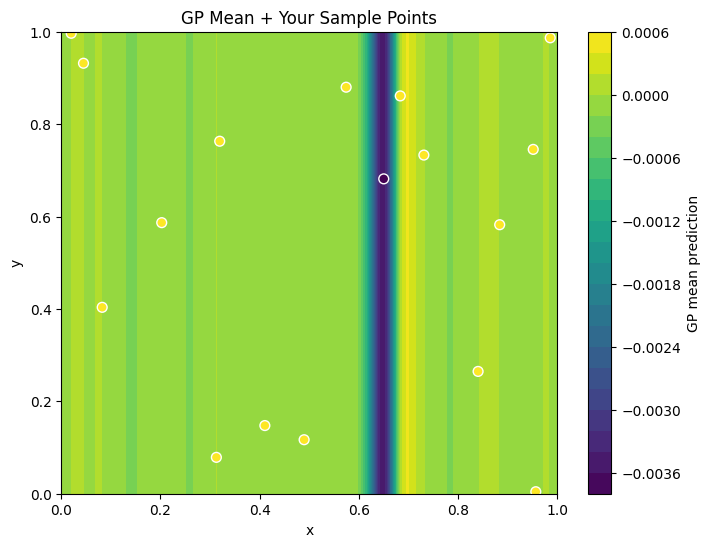

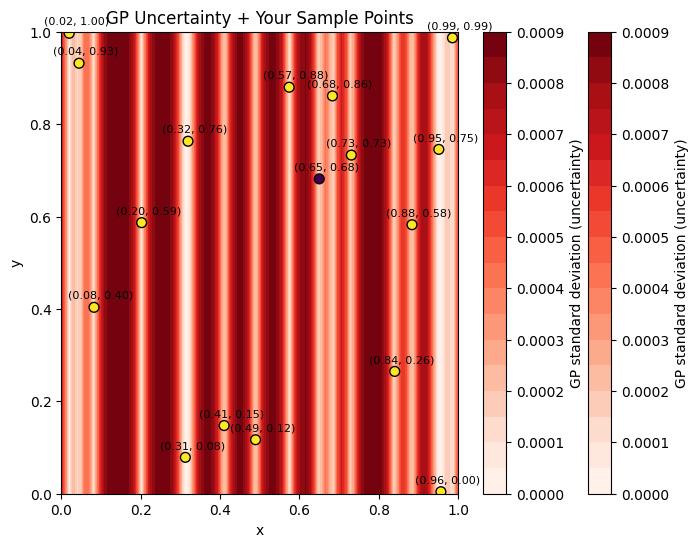

[[0.31940388883889725, 0.7629593742689353], [0.5743292145098291, 0.879898104984359], [0.7310236309563586, 0.7329998764152272], [0.8403534169072556, 0.26473161399676703], [0.6501140597987644, 0.6815263520602101], [0.41043713662518566, 0.14755429902998185], [0.31269115679477755, 0.07872277794971883], [0.6834181688515067, 0.8610574643936101], [0.08250725182080587, 0.403487506426324], [0.8838898288181171, 0.5822539743824439], [0.202514, 0.586723], [0.489595, 0.116877], [0.020026, 0.996624], [0.956717, 0.004359], [0.985825, 0.98681], [0.044772, 0.931757], [0.951495, 0.745322]]


In [16]:
# Make a grid in [0,1] × [0,1] (or whatever your bounds are)
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
grid = np.vstack([xx1.ravel(), xx2.ravel()]).T  # shape (10000, 2)

# Predict mean and std from GP
mean_pred, std_pred = gp.predict(grid, return_std=True)
mean_pred = mean_pred.reshape(xx1.shape)
std_pred = std_pred.reshape(xx1.shape)

# Plot the mean
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, mean_pred, cmap="viridis", levels=20)
plt.colorbar(label="GP mean prediction")

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="white", s=50, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.title("GP Mean + Your Sample Points")
plt.show()

# Plot uncertainty
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, std_pred, cmap="Reds", levels=20)
plt.colorbar(label="GP standard deviation (uncertainty)")
import matplotlib.pyplot as plt

# Scatter plot of uncertainty (or whatever)
plt.contourf(xx1, xx2, std_pred, cmap="Reds", levels=20)
plt.colorbar(label="GP standard deviation (uncertainty)")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors="black", s=50)

# Annotate each point with its index (or any label you want)
for i, pt in enumerate(X):
    # Unpack first 2 dimensions only
    x_i, y_i = pt[0], pt[1]
    plt.annotate(
        f"({x_i:.2f}, {y_i:.2f})",
        xy=(x_i, y_i),
        xytext=(5, 5),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=8
    )



plt.xlabel("x")
plt.ylabel("y")
plt.title("GP Uncertainty + Your Sample Points")
plt.show()
# Suppose X is your numpy array of points, shape (n, 2)
points_list = X.tolist()
print(points_list)

In [18]:
import numpy as np

points = np.array(p)
outputs = np.array(outputs)

# Get index of top N points
top_indices = np.argsort(outputs)[-5:]  # top 5
print(points[top_indices])
print(outputs[top_indices])


NameError: name 'p' is not defined

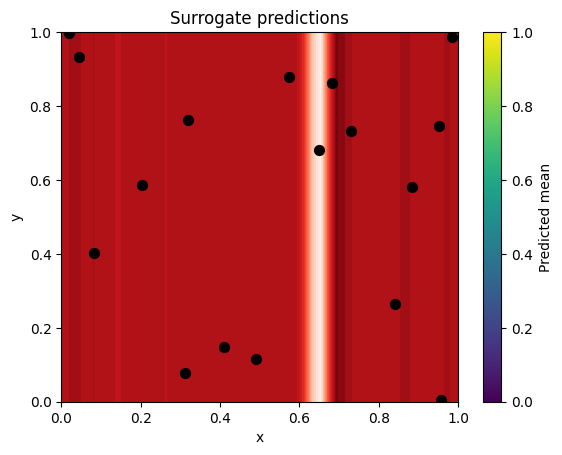

In [19]:
# Example: if you have a trained GP surrogate
xx1, xx2 = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
Xgrid = np.c_[xx1.ravel(), xx2.ravel()]
mean_pred, std_pred = gp.predict(Xgrid, return_std=True)
mean_pred = mean_pred.reshape(xx1.shape)

plt.contourf(xx1, xx2, mean_pred, cmap="Reds", levels=20)
plt.scatter(X[:,0], X[:,1], c='black', s=50, label="Sampled points")
plt.colorbar(label="Predicted mean")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Surrogate predictions")
plt.show()


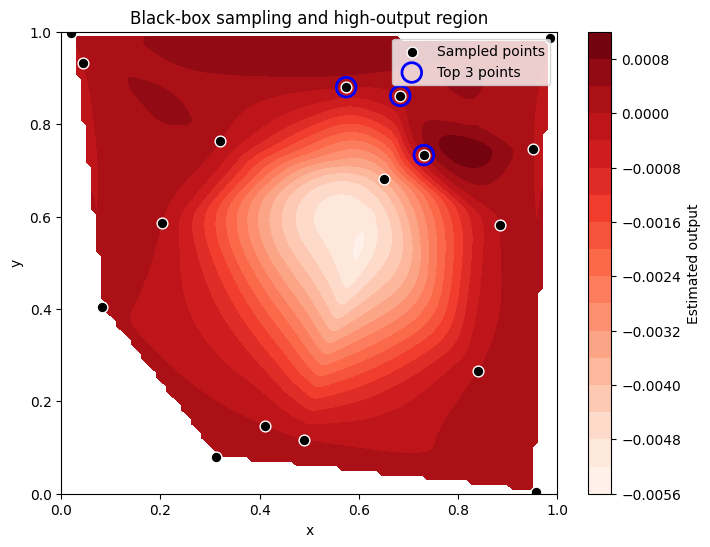

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Your sample points
points = X

# Observed outputs at each point
outputs = y

# Create a grid for plotting
grid_x, grid_y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
grid_z = griddata(points, outputs, (grid_x, grid_y), method='cubic')

# Plot interpolated output surface
plt.figure(figsize=(8,6))
plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='Reds')
plt.colorbar(label='Estimated output')

# Plot sampled points
plt.scatter(points[:,0], points[:,1], c='black', s=60, label='Sampled points', edgecolors='white')

# Highlight top 3 outputs
top3_idx = np.argsort(outputs)[-3:]
top3 = points[top3_idx]
plt.scatter(top3[:,0], top3[:,1], facecolors='none', edgecolors='blue', s=200, linewidths=2, label='Top 3 points')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Black-box sampling and high-output region')
plt.legend()
plt.show()


What this does:

Interpolates your observed outputs to create a smooth “output surface.”

Shows sampled points in black.

Highlights top 3 outputs in blue.

How to interpret:

If your sampled points cluster near the blue points → your surrogate is exploiting correctly.

If the top-output region has no nearby points → your surrogate is missing the high region.

This gives a visual check of whether your surrogate is exploring the promising areas.

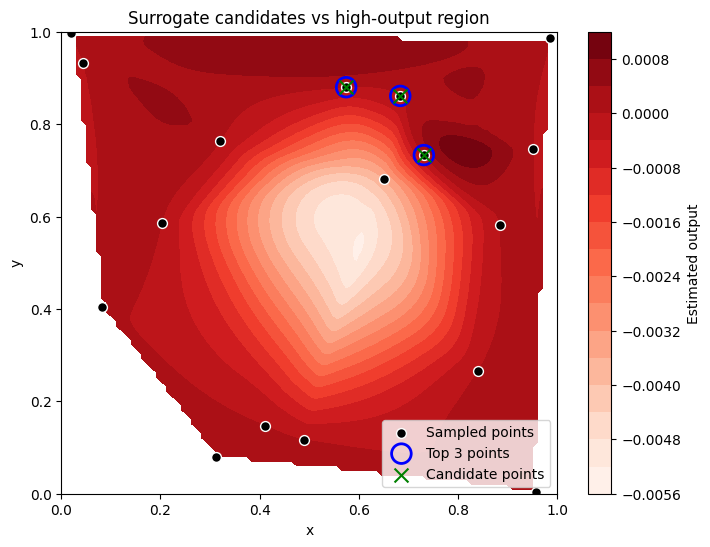

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Sampled points
points = X

# Observed outputs
outputs = y

# Candidate points proposed by the surrogate
candidates = np.array([
    [0.7310, 0.7330], [0.6834, 0.8610], [0.5743, 0.8798]
])

# Create a grid to interpolate outputs
grid_x, grid_y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
grid_z = griddata(points, outputs, (grid_x, grid_y), method='cubic')

plt.figure(figsize=(8,6))

# Interpolated output surface
plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='Reds')
plt.colorbar(label='Estimated output')

# Sampled points
plt.scatter(points[:,0], points[:,1], c='black', s=50, edgecolors='white', label='Sampled points')

# Top 3 outputs
top3_idx = np.argsort(outputs)[-3:]
plt.scatter(points[top3_idx,0], points[top3_idx,1], facecolors='none', edgecolors='blue', s=200, linewidths=2, label='Top 3 points')

# Candidate points
plt.scatter(candidates[:,0], candidates[:,1], marker='x', c='green', s=100, label='Candidate points')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Surrogate candidates vs high-output region')
plt.legend()
plt.show()


ow to read this:

Black points → already sampled points

Blue circles → top observed outputs (highest y)

Green crosses → surrogate’s next suggested points

Interpretation:

If green crosses are near the blue circles → surrogate is exploiting the promising region correctly.

If green crosses are far from the blue circles → surrogate is exploring the wrong region.